# Random Forest Classification

In [5]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import PIL.Image as Image
import os

In [26]:
df = pd.read_csv('../swarmIoT_full_labeled_dataset.csv')
folder_path = '../ordered_data'

x = []
y = []

dirs = []
dirs.append(os.listdir(f'{folder_path}/0'))
dirs.append(os.listdir(f'{folder_path}/1'))
dirs.append(os.listdir(f'{folder_path}/2'))

for d in dirs:
    np.random.shuffle(d)

for c in range(3):
    for i in range(800):
        path = f'{folder_path}/{c}/{dirs[c][i]}'
        img = Image.open(path)
        # Resize the image to 200x200 for faster processing
        img = img.resize((200, 200))
        img = np.array(img)
        x.append(img)
        y.append(c)

x = np.array(x)
y = np.array(y)

# Reshape the data to 2D for the classifier
x = x.reshape(x.shape[0], -1)

# Normalize the pixel values to be between 0 and 1
x = x / 255

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
rtc = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
rtc.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [30]:
y_pred = rtc.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Accuracy: 0.6542


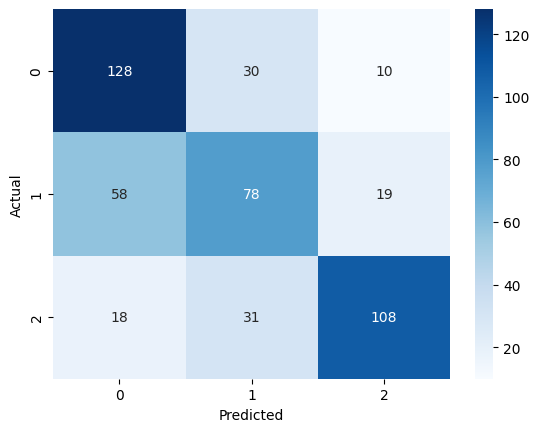

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


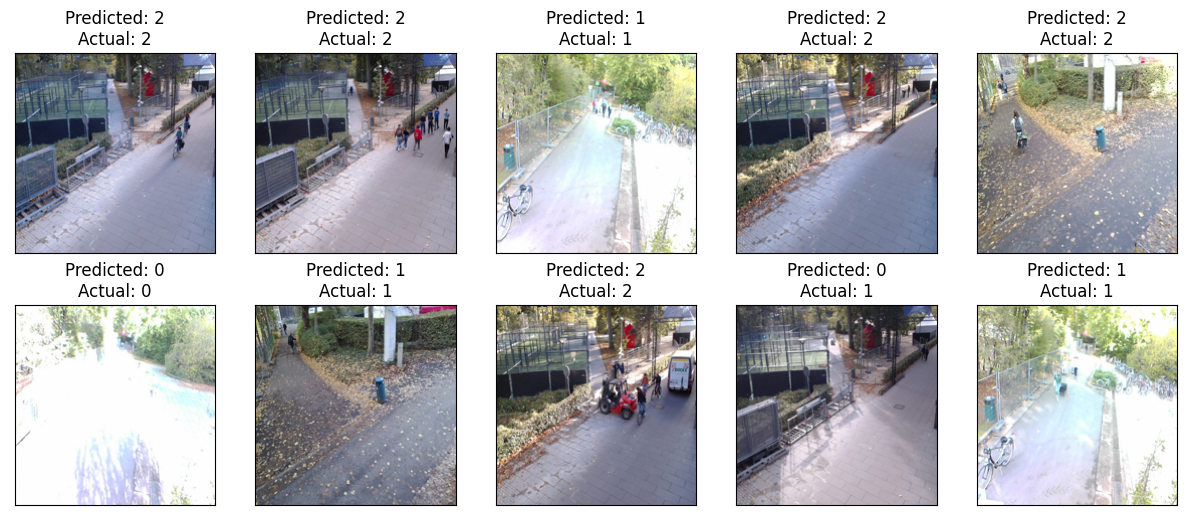

In [36]:
# Show a couple of images with their predicted and actual labels
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(200, 200, 3))
    axi.set(xticks=[], yticks=[])
    axi.title.set_text(f'Predicted: {y_pred[i]}\nActual: {y_test[i]}')
plt.show()
